# 9 Run to other models

Create an all-in-one class to compare different models

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, ShuffleSplit, cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error

import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

std = StandardScaler()

In [45]:
class data_modeler:
    def __init__(self, X, y, scale = True, std = StandardScaler()):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.25, random_state=123)
        std.fit(self.X_train)
        
        self.X_tr = std.transform(self.X_train)
        self.X_te = std.transform(self.X_test)
    
    def run_linreg(self,  
                   scale = True):
        """
        Scales data and fits linreg model. Returns metrics.
        """

        self.lr_model = LinearRegression() 
        self.lr_model.fit(self.X_tr,self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.lr_model.predict(self.X_tr)
        test_set_pred = self.lr_model.predict(self.X_te)

        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Val RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.lr_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.lr_model.score(self.X_te, self.y_test):.3f}")
        
        return self.lr_model
        

    def run_ridge(self, 
              lambda_,
              std = std, 
              scale = True):
        """
        Scales data and fits ridge model. Returns fitted model. Prints metrics.
        """
        self.ridge_model = Ridge(alpha=lambda_) 
        self.ridge_model.fit(self.X_tr,self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.ridge_model.predict(self.X_tr)
        test_set_pred = self.ridge_model.predict(self.X_te)

        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.ridge_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.ridge_model.score(self.X_te, self.y_test):.3f}")
        
        return self.ridge_model

    def run_ridgeCV(self, 
                    alphas_,
                    cv = 5,
                    std = std, 
                    scale = True):
        """
        Scales data and fits ridge model. Returns fitted model. Prints metrics.
        """
        self.ridge_CV_model = RidgeCV(alphas=alphas_, cv = cv) 
        self.ridge_CV_model.fit(self.X_tr,self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.ridge_CV_model.predict(self.X_tr)
        test_set_pred = self.ridge_CV_model.predict(self.X_te)

        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.ridge_CV_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.ridge_CV_model.score(self.X_te, self.y_test):.3f}")
        
        print(f"Best alpha: {self.ridge_CV_model.alpha_}")
        return self.ridge_CV_model
     
    def run_dec_tree(self):

        self.dec_tree_model = DecisionTreeRegressor()
        self.dec_tree_model.fit(self.X_tr,self.y_train) # saves fitted model    
        
#         fig = plt.figure(figsize=(12,12))
#         plot_tree(self.dec_tree_model,filled=True,node_ids=True);
        
        # Predict
        train_set_pred = self.dec_tree_model.predict(self.X_tr)
        test_set_pred = self.dec_tree_model.predict(self.X_te)        
        
        ### ASSESS MODEL
        # MAE, RMSE, R^2, CV?

        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.dec_tree_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.dec_tree_model.score(self.X_te, self.y_test):.3f}")
        
        return self.dec_tree_model
    
    def run_XGB(self,
               max_depth = 6,
               n_estimators = 10):

        self.XGB_model = XGBRegressor(max_depth=max_depth, n_estimators = n_estimators) 
        self.XGB_model.fit(self.X_tr, self.y_train) # saves fitted model
        
        # Predict
        train_set_pred = self.XGB_model.predict(self.X_tr)
        test_set_pred = self.XGB_model.predict(self.X_te)    
        
        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Val RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.XGB_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.XGB_model.score(self.X_te, self.y_test):.3f}")
        
        return self.XGB_model
    
    
    
    def run_catboost(self,
                     depth = 6,
                     iterations = 10,
                     cat_features = None,
                     verbose = False):
        

        self.catboost_model = CatBoostRegressor(depth=depth, 
                                                iterations=iterations) 
        self.catboost_model.fit(self.X_tr, self.y_train,
                               cat_features=cat_features, verbose=verbose) # saves fitted model
        
        # Predict
        train_set_pred = self.catboost_model.predict(self.X_tr)
        test_set_pred = self.catboost_model.predict(self.X_te)    
        
        
        # MAE
        train_mae = mean_absolute_error(self.y_train, train_set_pred)
        test_mae = mean_absolute_error(self.y_test, test_set_pred)
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(self.y_train, train_set_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, test_set_pred))
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Val RMSE: {test_rmse:.2f}")

        # r2
        print(f"Train r2: {self.catboost_model.score(self.X_tr, self.y_train):.3f}")
        print(f"Test r2: {self.catboost_model.score(self.X_te, self.y_test):.3f}")
        
        return self.catboost_model


    
    
    def plot_learning_curve(self, 
                            estimator, 
                            title,scoring=None, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        if axes is None:
            _, axes = plt.subplots(1, 3, figsize=(20, 5))

        axes[0].set_title(title)
#         if ylim is not None:
#             axes[0].set_ylim(*ylim)
        axes[0].set_xlabel("Training examples")
        axes[0].set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, 
                           self.X, 
                           self.y, 
                           cv=cv, 
                           scoring=scoring,
                           n_jobs=n_jobs, 
                           train_sizes=train_sizes, 
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        # Plot learning curve
        axes[0].grid()
        axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
        axes[1].grid()
        axes[1].plot(train_sizes, fit_times_mean, 'o-')
        axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                             fit_times_mean + fit_times_std, alpha=0.1)
        axes[1].set_xlabel("Training examples")
        axes[1].set_ylabel("fit_times")
        axes[1].set_title("Scalability of the model")

        # Plot fit_time vs score
        axes[2].grid()
        axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
        axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1)
        axes[2].set_xlabel("fit_times")
        axes[2].set_ylabel("Score")
        axes[2].set_title("Performance of the model")

        return plt  


In [46]:
## Load in the Ames Housing Data
datafile = "data/AmesHousingCleanedQuadratic.csv"
df=pd.read_csv(datafile)

In [47]:
larger_df = df.dropna(how = 'any',axis = 1)

larger_df.columns

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area',
       'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_

In [48]:
X_large = pd.get_dummies(larger_df).drop(columns = 'saleprice',axis=1)
y_large = larger_df['saleprice']


In [49]:
housing = data_modeler(X_large,y_large)

### Linear regression

In [50]:
housinglr = housing.run_linreg()

Train MAE: 14642.82
Test MAE: 1132836985972770.75
Train RMSE: 22869.36
Val RMSE: 30670397678200396.00
Train r2: 0.920
Test r2: -158505584077758640685056.000


In [51]:
housing.lr_model

LinearRegression()

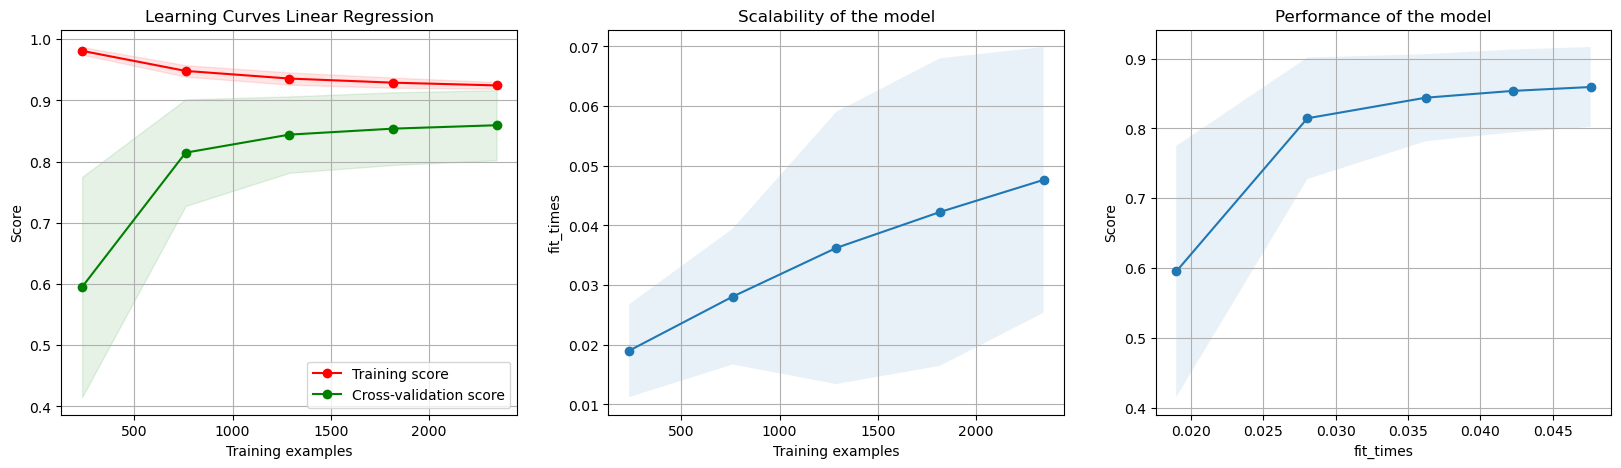

In [52]:
title = "Learning Curves Linear Regression"
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
estimator = housinglr # our saved model; can also simply do LinearRegression() here
# estimator = LinearRegression()
housing.plot_learning_curve(estimator, title, cv=cv, n_jobs=4)
# What's notable here is that the class instance contains OUR DATA, 
# thus there is no reason to specify X and y

plt.show()


### Linear regression with Ridge regularization

In [53]:
housingridge = housing.run_ridge(lambda_ = 1)

Train MAE: 14239.62
Test MAE: 15928.04
Train RMSE: 22514.85
Test RMSE: 25175.29
Train r2: 0.922
Test r2: 0.893


/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.24599e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.37778e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.65885e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00648e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

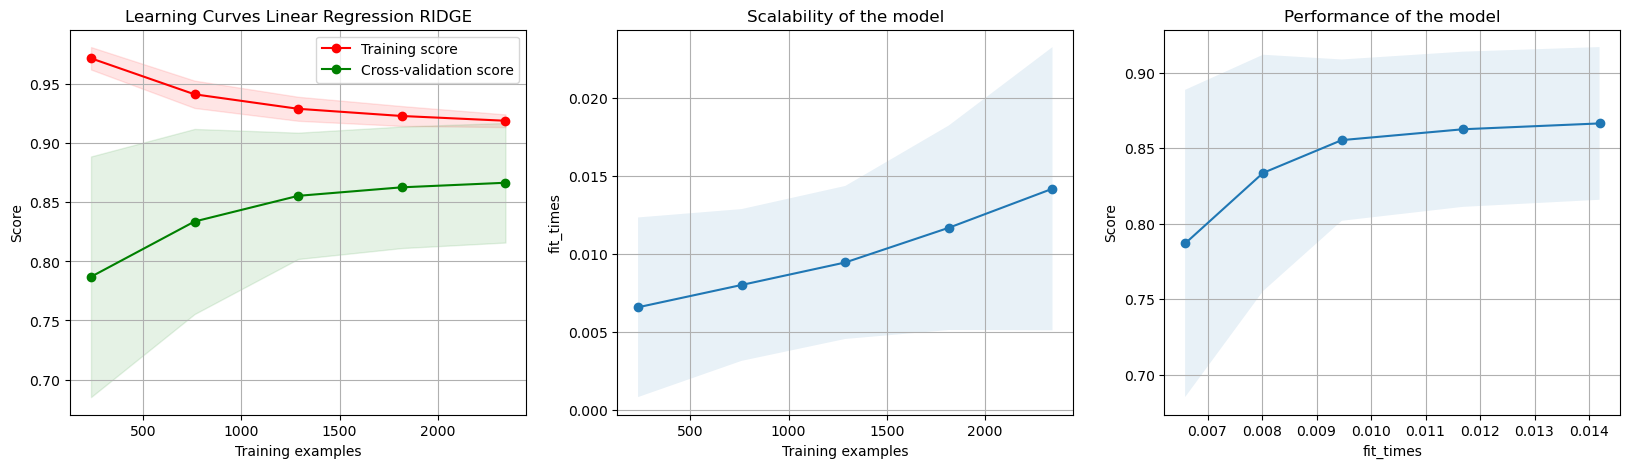

In [54]:
title = "Learning Curves Linear Regression RIDGE"
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
estimator = housingridge # our saved model; can also simply do LinearRegression() here
# estimator = LinearRegression()
housing.plot_learning_curve(estimator, title, cv=cv, n_jobs=4)
# What's notable here is that the class instance contains OUR DATA, 
# thus there is no reason to specify X and y

plt.show()

In [55]:
housing.run_ridge(lambda_ = 2)

Train MAE: 14247.47
Test MAE: 15919.15
Train RMSE: 22522.36
Test RMSE: 25183.53
Train r2: 0.922
Test r2: 0.893


Ridge(alpha=2)

### Linear regression with Ridge regularization and cross validation

In [56]:
alphavec = 10**np.linspace(-3,9,27)
alphavec

array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
       2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
       1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
       1.19377664e+08, 3.45510729e+08, 1.00000000e+09])

In [57]:
for i in alphavec:
    print(f"alpha: {i}")
    housing.run_ridge(lambda_=i)
    print('\n')

alpha: 0.001
Train MAE: 14236.91
Test MAE: 15945.16
Train RMSE: 22511.71
Test RMSE: 25171.42
Train r2: 0.922
Test r2: 0.893


alpha: 0.0028942661247167516
Train MAE: 14236.91
Test MAE: 15945.11
Train RMSE: 22511.71
Test RMSE: 25171.42
Train r2: 0.922
Test r2: 0.893


alpha: 0.008376776400682925
Train MAE: 14236.92
Test MAE: 15944.97
Train RMSE: 22511.71
Test RMSE: 25171.43
Train r2: 0.922
Test r2: 0.893


alpha: 0.024244620170823284
Train MAE: 14236.92
Test MAE: 15944.57
Train RMSE: 22511.71
Test RMSE: 25171.44
Train r2: 0.922
Test r2: 0.893


alpha: 0.07017038286703829
Train MAE: 14236.95
Test MAE: 15943.42
Train RMSE: 22511.73
Test RMSE: 25171.48
Train r2: 0.922
Test r2: 0.893


alpha: 0.2030917620904737
Train MAE: 14237.03
Test MAE: 15940.23
Train RMSE: 22511.86
Test RMSE: 25171.69
Train r2: 0.922
Test r2: 0.893


alpha: 0.5878016072274912
Train MAE: 14237.84
Test MAE: 15933.06
Train RMSE: 22512.88
Test RMSE: 25172.98
Train r2: 0.922
Test r2: 0.893


alpha: 1.7012542798525891
Train 

In [58]:
rid = housing.run_ridgeCV(alphas_= alphavec, cv=10)
# print(f"Best alpha: {rid.alpha_}")

Train MAE: 15791.09
Test MAE: 15618.11
Train RMSE: 25308.51
Test RMSE: 24015.74
Train r2: 0.902
Test r2: 0.903
Best alpha: 1000.0


In [59]:
rid.get_params()

{'alpha_per_target': False,
 'alphas': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
        7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
        4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
        3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
        2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
        1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
        1.19377664e+08, 3.45510729e+08, 1.00000000e+09]),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.10392e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditi

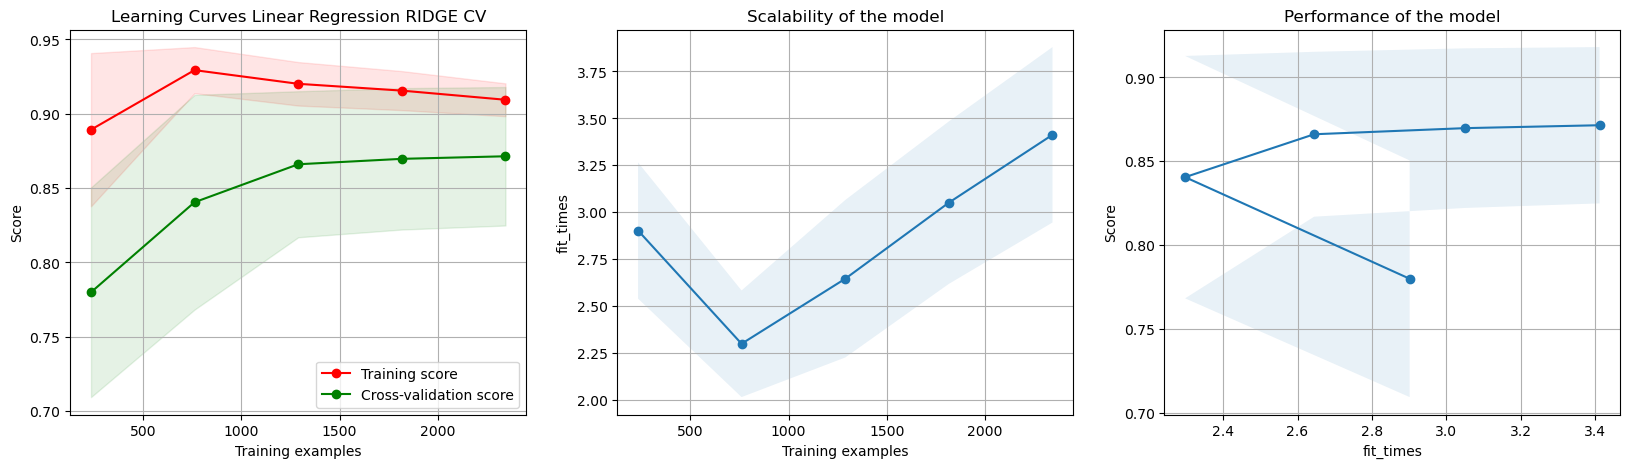

In [60]:
title = "Learning Curves Linear Regression RIDGE CV"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = rid # our saved model; can also simply do LinearRegression() here
# estimator = LinearRegression()
housing.plot_learning_curve(estimator, title, cv=cv, n_jobs=4)
# What's notable here is that the class instance contains OUR DATA, 
# thus there is no reason to specify X and y

plt.show()


### Decision Tree regressor

In [61]:
housing.run_dec_tree()

Train MAE: 0.00
Test MAE: 23976.68
Train RMSE: 0.00
Test RMSE: 35815.09
Train r2: 1.000
Test r2: 0.784


DecisionTreeRegressor()

### XGBoost regressor

In [62]:
housing.run_XGB()

Train MAE: 9884.64
Test MAE: 16372.79
Train RMSE: 13242.76
Val RMSE: 24894.54
Train r2: 0.973
Test r2: 0.896


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Catboost regressor

In [63]:
cats = list(X_large.select_dtypes(include = 'object').columns)
housing.run_catboost(cat_features = cats)

Train MAE: 16322.39
Test MAE: 17995.77
Train RMSE: 22980.56
Val RMSE: 26465.39
Train r2: 0.919
Test r2: 0.882


In [64]:
cats = list(X_large.select_dtypes(include = 'object').columns)
for i in range(1,16):
    print(i)
    x=housing.run_catboost(cat_features = cats, depth = i)
    print('\n')
    x.score(housing.X_train, housing.y_train)


1
Train MAE: 26087.26
Test MAE: 24220.83
Train RMSE: 37064.98
Val RMSE: 34442.64
Train r2: 0.789
Test r2: 0.800


2
Train MAE: 22050.44
Test MAE: 21167.41
Train RMSE: 32009.65
Val RMSE: 31098.75
Train r2: 0.843
Test r2: 0.837


3
Train MAE: 20215.91
Test MAE: 19192.29
Train RMSE: 28680.22
Val RMSE: 27644.62
Train r2: 0.874
Test r2: 0.871


4
Train MAE: 19194.96
Test MAE: 18431.04
Train RMSE: 27261.78
Val RMSE: 26200.57
Train r2: 0.886
Test r2: 0.884


5
Train MAE: 17953.38
Test MAE: 17511.42
Train RMSE: 25327.42
Val RMSE: 26210.44
Train r2: 0.902
Test r2: 0.884


6
Train MAE: 16322.39
Test MAE: 17995.77
Train RMSE: 22980.56
Val RMSE: 26465.39
Train r2: 0.919
Test r2: 0.882


7
Train MAE: 16598.91
Test MAE: 17376.80
Train RMSE: 22795.71
Val RMSE: 25098.44
Train r2: 0.920
Test r2: 0.894


8
Train MAE: 15376.72
Test MAE: 17341.12
Train RMSE: 21557.77
Val RMSE: 24942.19
Train r2: 0.929
Test r2: 0.895


9
Train MAE: 15138.70
Test MAE: 16691.97
Train RMSE: 20862.62
Val RMSE: 24801.11
Train r

In [65]:
# Load the existing model comparison CSV
model_comparison_df = pd.read_csv('model_comparison.csv')

# Create new rows with the stats for each model
new_rows = pd.DataFrame([
    {
        'Model': 'Linear Regression',
        'R2': housing.lr_model.score(housing.X_te, housing.y_test),
        'Train_MAE': mean_absolute_error(housing.y_train, housing.lr_model.predict(housing.X_tr)),
        'Val_MAE': mean_absolute_error(housing.y_test, housing.lr_model.predict(housing.X_te)),
        'Train_RMSE': np.sqrt(mean_squared_error(housing.y_train, housing.lr_model.predict(housing.X_tr))),
        'Val_RMSE': np.sqrt(mean_squared_error(housing.y_test, housing.lr_model.predict(housing.X_te)))
    },
    {
        'Model': 'Ridge Regression',
        'R2': housing.ridge_model.score(housing.X_te, housing.y_test),
        'Train_MAE': mean_absolute_error(housing.y_train, housing.ridge_model.predict(housing.X_tr)),
        'Val_MAE': mean_absolute_error(housing.y_test, housing.ridge_model.predict(housing.X_te)),
        'Train_RMSE': np.sqrt(mean_squared_error(housing.y_train, housing.ridge_model.predict(housing.X_tr))),
        'Val_RMSE': np.sqrt(mean_squared_error(housing.y_test, housing.ridge_model.predict(housing.X_te)))
    },
    {
        'Model': 'RidgeCV Regression',
        'R2': housing.ridge_CV_model.score(housing.X_te, housing.y_test),
        'Train_MAE': mean_absolute_error(housing.y_train, housing.ridge_CV_model.predict(housing.X_tr)),
        'Val_MAE': mean_absolute_error(housing.y_test, housing.ridge_CV_model.predict(housing.X_te)),
        'Train_RMSE': np.sqrt(mean_squared_error(housing.y_train, housing.ridge_CV_model.predict(housing.X_tr))),
        'Val_RMSE': np.sqrt(mean_squared_error(housing.y_test, housing.ridge_CV_model.predict(housing.X_te)))
    },
    {
        'Model': 'Decision Tree',
        'R2': housing.dec_tree_model.score(housing.X_te, housing.y_test),
        'Train_MAE': mean_absolute_error(housing.y_train, housing.dec_tree_model.predict(housing.X_tr)),
        'Val_MAE': mean_absolute_error(housing.y_test, housing.dec_tree_model.predict(housing.X_te)),
        'Train_RMSE': np.sqrt(mean_squared_error(housing.y_train, housing.dec_tree_model.predict(housing.X_tr))),
        'Val_RMSE': np.sqrt(mean_squared_error(housing.y_test, housing.dec_tree_model.predict(housing.X_te)))
    },
    {
        'Model': 'XGBoost',
        'R2': housing.XGB_model.score(housing.X_te, housing.y_test),
        'Train_MAE': mean_absolute_error(housing.y_train, housing.XGB_model.predict(housing.X_tr)),
        'Val_MAE': mean_absolute_error(housing.y_test, housing.XGB_model.predict(housing.X_te)),
        'Train_RMSE': np.sqrt(mean_squared_error(housing.y_train, housing.XGB_model.predict(housing.X_tr))),
        'Val_RMSE': np.sqrt(mean_squared_error(housing.y_test, housing.XGB_model.predict(housing.X_te)))
    },
    {
        'Model': 'CatBoost',
        'R2': housing.catboost_model.score(housing.X_te, housing.y_test),
        'Train_MAE': mean_absolute_error(housing.y_train, housing.catboost_model.predict(housing.X_tr)),
        'Val_MAE': mean_absolute_error(housing.y_test, housing.catboost_model.predict(housing.X_te)),
        'Train_RMSE': np.sqrt(mean_squared_error(housing.y_train, housing.catboost_model.predict(housing.X_tr))),
        'Val_RMSE': np.sqrt(mean_squared_error(housing.y_test, housing.catboost_model.predict(housing.X_te)))
    }
])

# Append the new rows to the dataframe
model_comparison_df = pd.concat([model_comparison_df, new_rows], ignore_index=True)

# Save the updated dataframe back to the CSV
model_comparison_df.to_csv('model_comparison.csv', index=False)